#MOLECULAR MODEL

# VARIABLES AND FUNTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

In [2]:
escala_min = 0.165e-9         #min value for x [m],
escala_max = 11e-9            #max value for x [m],
fitting_value = 1000          #points for fitting
nc=163                        #n chains

r = np.linspace(escala_min, escala_max, num=1000000)
HR2 = np.array([[29.5,39.9,81.5]])
sigmaHR1=7.3236E-10
sigmaHR2=7.5072E-10
sigmaHR3=7.6413E-10
sigma = np.array([sigmaHR1,sigmaHR2,sigmaHR3])


In [3]:
def interaction():
  v = []; F = []; rfitting = []; Ffitting = []; k = []; model = []; r_squared = []; E=[]
  punto_corte = 0
  for i, j in enumerate(sigma):
    v_aux = 4*epsilon[i]*(((sigma[i]/r)**12)-((sigma[i]/r)**6))
    v.append(v_aux)
    FF = -np.gradient(v_aux,r)
    F.append(FF)
    for index in range (len(r)):
        if(FF[index-1]>0 and FF[index]<0):
            punto_corte=index
    rfit = r[(punto_corte) - (fitting_value) : (punto_corte) + (fitting_value)]
    Ffit = FF[(punto_corte) - (fitting_value) : (punto_corte) + (fitting_value)]
    rfitting.append(rfit)
    Ffitting.append(Ffit)
    mod = LinearRegression().fit(rfit.reshape((-1, 1)), Ffit)
    model.append(mod)
    k.append(-mod.coef_)
    r_squared.append(mod.score(rfit.reshape(-1,1), Ffit))
    r_aux = sigma[i]/2
    Aa = np.pi*r_aux**2
    Eaux=float((k[i]*(sigma[i]/Aa)))
    E.append(Eaux)
  return(r, v, F, rfitting, Ffitting, k, model,r_squared,E)

#MODEL 1

In [4]:
epsilon = 2.3025E-21            #[J]
epsilon = np.array([epsilon,epsilon,epsilon])

In [5]:
r, v, F, rfitting, Ffitting, k, model,r_squared,E = interaction()

/tmp/ipykernel_19027/4000187177.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Eaux=float((k[i]*(sigma[i]/Aa)))
/tmp/ipykernel_19027/4000187177.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Eaux=float((k[i]*(sigma[i]/Aa)))
/tmp/ipykernel_19027/4000187177.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Eaux=float((k[i]*(sigma[i]/Aa)))


## POTENTIAL AND FORCE

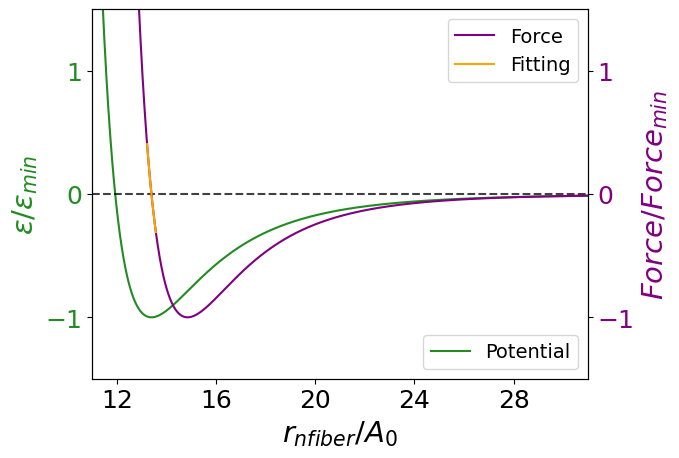

In [6]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('$r_{nfiber}/A_0$',size =21)
ax1.set_ylabel('$\\epsilon$/$\\epsilon_{min}$', color = '#228B22',size =21)
ax1.plot(((r*1e9*nc)/10), ((v[0]*1e21)/(-np.min(v[0])*1e21)), color = '#228B22',label = 'Potential')
info_leyenda = [("#228B22", "Potential")]
plt.legend([Line2D([0], [0], color=clave[0], lw=2) for clave in info_leyenda],[clave[1] for clave in info_leyenda],loc='lower right')
ax1.tick_params(axis ='y', labelcolor = '#228B22')
ax1.set_ylim(-1.5,1.5)
plt.axhline(y=0, color='k', linestyle='--',alpha=0.75)
parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('$Force/Force_{min}$', color = 'purple',size =21)
ax2.plot((r*1e9*nc)/10, (F[0]*1e12)/(-np.min(F[0])*1e12), color = 'purple', label = 'Force')
ax2.plot((rfitting[0]*1e9*nc)/10,(Ffitting[0]*1e12/-np.min(F[0]*1e12)),color='orange', label= 'Fitting',linestyle='-')
info_leyenda = [("purple", "Force"),("orange","Fitting")]
plt.legend([Line2D([0], [0], color=clave[0], lw=2) for clave in info_leyenda],[clave[1] for clave in info_leyenda],loc='upper right')
ax2.tick_params(axis ='y', labelcolor = 'purple')
ax2.set_ylim(-1.5,1.5)
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')
plt.xlim(11, 31)
parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
ax1.yaxis.set_major_locator(ticker.MaxNLocator(3))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(3))
ax1.xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.savefig('Figures/LJ_1.png', bbox_inches='tight',dpi=400)
plt.show()


## POTENTIAL

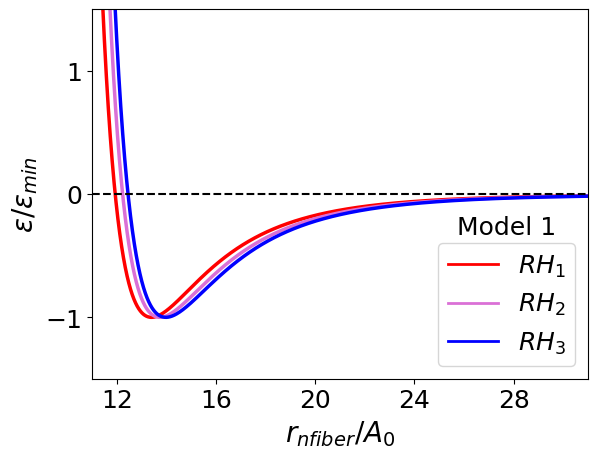

In [7]:
colores = ['red', 'orchid' , 'blue']
plt.figure()
parameters = {'legend.fontsize': 18}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
for i in range(len(v)):
  plt.plot((r*1e9*nc)/10, (v[i]*1e21)/(-np.min(v[0])*1e21),linewidth=2.5,color=colores[i])
plt.xlabel('$r_{nfiber}/A_0$', size=20)
plt.ylabel('$\\epsilon$/$\\epsilon_{min}$', size=20)
plt.xlim(11, 31)
plt.ylim(-1.5,1.5)
plt.locator_params(axis='y', nbins=5)
info_leyenda = [("r", "$RH_1$"),("orchid", "$RH_2$"),("b", "$RH_3$")]
plt.legend([Line2D([0], [0], color=clave[0], lw=2) for clave in info_leyenda],[clave[1] for clave in info_leyenda],
           loc="lower right")
plt.axhline(y=0, color='k', linestyle='--')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.text(0.85, 0.4, "Model 1", transform=plt.gcf().transFigure, fontsize=18,ha='right', va='bottom')


plt.savefig('Figures/potential_fit1.png', bbox_inches='tight',dpi=400)
plt.show()


## FORCE

In [8]:
# ============ PRINT R_SQUARED ===============
for i in range(len(sigma)):
  print('R_SQUARED "R^2" FOR RH',[i+1],'IS:',r_squared[i])

# ===========================================

R_SQUARED "R^2" FOR RH [1] IS: 0.994936962176559
R_SQUARED "R^2" FOR RH [2] IS: 0.9951795569983314
R_SQUARED "R^2" FOR RH [3] IS: 0.9953460031134318


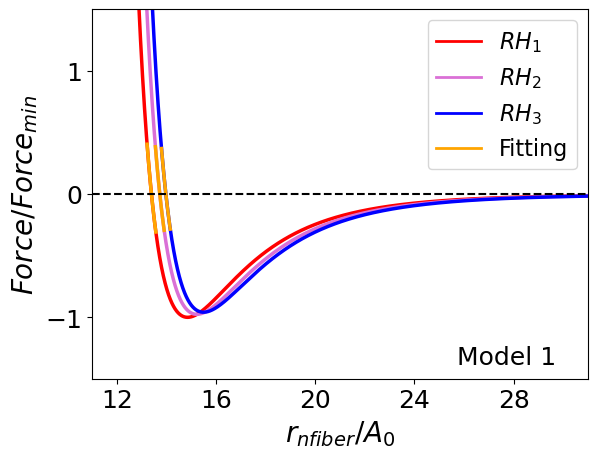

In [9]:
#grafica F(r) vs r
colores = ['red', 'orchid' , 'blue']
plt.figure(1)
parameters = {'legend.fontsize': 16}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
for i in range (len(sigma)):
  plt.plot((r*1e9*nc)/10, (F[i]*1e12/-np.min(F[0]*1e12)),linewidth=2.5,color=colores[i])
  plt.plot((rfitting[i]*1e9*nc)/10,(Ffitting[i]*1e12/-np.min(F[0]*1e12)),color='orange', label= 'Fitting',linestyle='-',linewidth=2.5)
plt.xlabel('$r_{nfiber}/A_0$', size=20)
plt.ylabel('$Force/Force_{min}$', size=20)

plt.xlim(11, 31)
plt.ylim(-1.5,1.5)
plt.locator_params(axis='y', nbins=5)
info_leyenda = [("r", "$RH_1$"),("orchid", "$RH_2$"),("b", "$RH_3$"),("orange","Fitting")]
plt.legend([Line2D([0], [0], color=clave[0], lw=2) for clave in info_leyenda],[clave[1] for clave in info_leyenda],loc='upper right')
plt.axhline(y=0, color='k', linestyle='--')
plt.text(0.85, 0.13, "Model 1", transform=plt.gcf().transFigure, fontsize=18,ha='right', va='bottom')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))


plt.savefig('Figures/fuerza_fit1.png', bbox_inches='tight',dpi=400)
plt.show()

In [10]:
# =========== PRINT SPRING CONSTANT ==========
for i in range(len(sigma)):
  print('SPRING CONSTANT "K" FOR RH',[i+1],'IS:',k[i])

# ============================================

SPRING CONSTANT "K" FOR RH [1] IS: [0.24687642]
SPRING CONSTANT "K" FOR RH [2] IS: [0.23487761]
SPRING CONSTANT "K" FOR RH [3] IS: [0.22667149]


In [11]:
# =========== PRINT YOUNG'S MODULE ==========
for i in range(len(sigma)):
  print("YOUNG'S MODULE FOR HR",[i+1],'IS:',E[i]*1e-6,'[MPa]')

  # =========================================

YOUNG'S MODULE FOR HR [1] IS: 429.2053354485419 [MPa]
YOUNG'S MODULE FOR HR [2] IS: 398.35819608048087 [MPa]
YOUNG'S MODULE FOR HR [3] IS: 377.69371928144324 [MPa]


## EPSILON, SIGMA AND RH vs YOUNG'S MODULUS

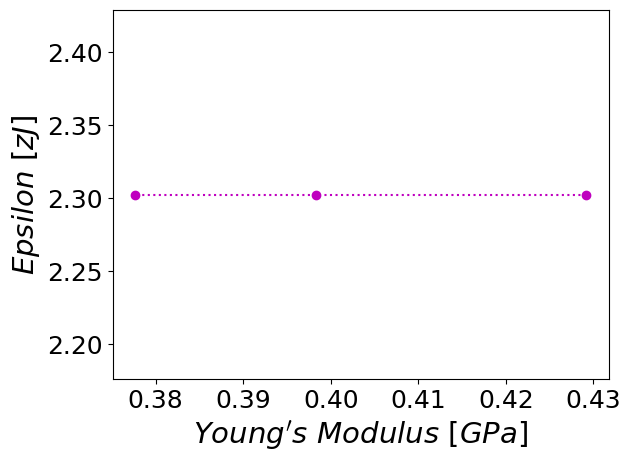

In [12]:
# epsilon vs. young's module
E1 = np.array(E)*1e-9
epsilon1 = epsilon*1e21
HRt2 = np.transpose(HR2)
plt.figure()
plt.plot(E1, epsilon1,':om')
plt.ylabel('$Epsilon\ [zJ]$', weight='bold', size=21)
plt.xlabel("$Young's\ Modulus\ [GPa]$", weight='bold', size=21)
parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
#plt.savefig('Figures/eps1.png', bbox_inches='tight',dpi=400)
plt.show()

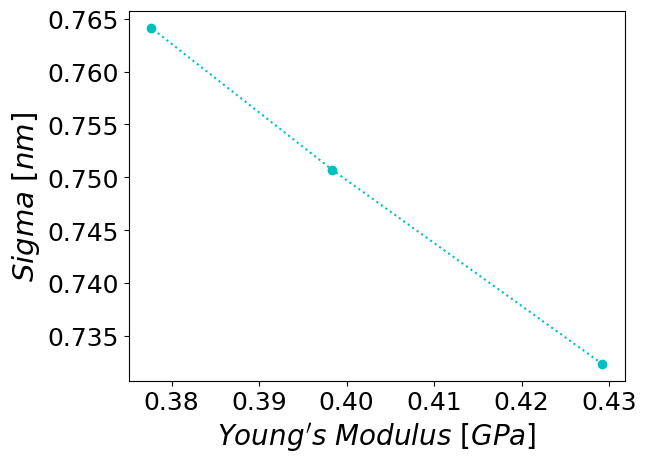

In [13]:
# sigma vs. young's module
plt.plot(E1, sigma*1e9,':oc')
plt.ylabel('$Sigma\ [nm]$', weight='bold', size=21)
plt.xlabel("$Young's\ Modulus\ [GPa]$", weight='bold', size=20)
parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
#plt.savefig('Figures/sigma1.png', bbox_inches='tight',dpi=400)
plt.show()

/tmp/ipykernel_19027/287741843.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ob-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(E1,HRt2,'ob-',linestyle='--')


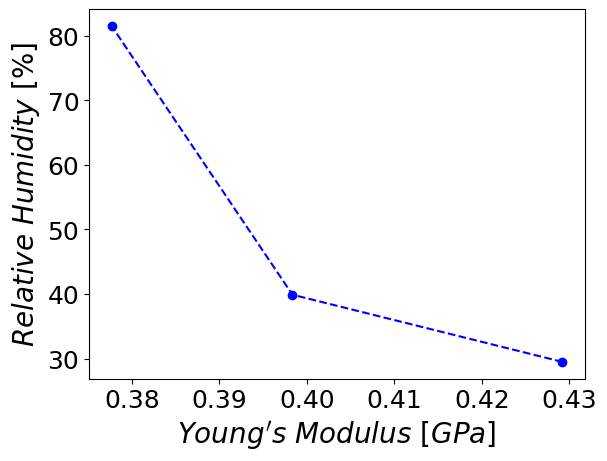

In [14]:
# RH vs. young's module
plt.plot(E1,HRt2,'ob-',linestyle='--')
plt.xlabel("$Young's\ Modulus\ [GPa]$", weight='bold', size=20)
plt.ylabel('$Relative\ Humidity\ [\%]$', weight='bold', size=20)
parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
#plt.savefig('Figures/rhy1.png', bbox_inches='tight',dpi=400)
plt.show()

#MODEL 2


In [15]:
epsilonHR1=3.1E-21
epsilonHR2=2.746E-21
epsilonHR3=1.19E-21
epsilon = np.array([epsilonHR1,epsilonHR2,epsilonHR3])

In [16]:
r, v, F, rfitting, Ffitting, k, model,r_squared,E = interaction()

/tmp/ipykernel_19027/4000187177.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Eaux=float((k[i]*(sigma[i]/Aa)))
/tmp/ipykernel_19027/4000187177.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Eaux=float((k[i]*(sigma[i]/Aa)))
/tmp/ipykernel_19027/4000187177.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Eaux=float((k[i]*(sigma[i]/Aa)))


## POTENTIAL AND FORCE

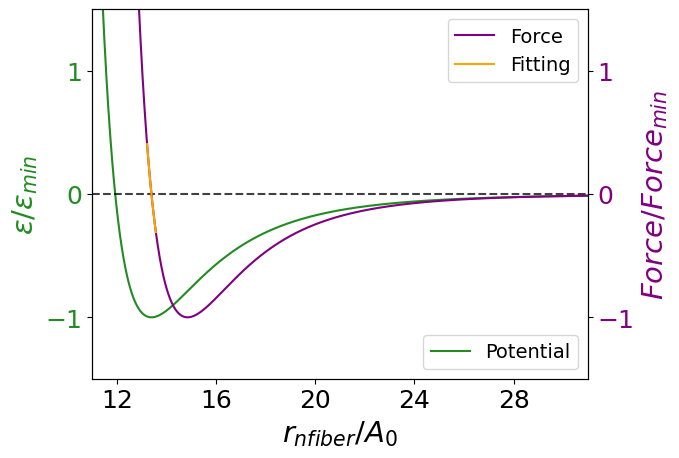

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('$r_{nfiber}/A_0$',size =21)
ax1.set_ylabel('$\\epsilon$/$\\epsilon_{min}$', color = '#228B22',size =21)
ax1.plot(((r*1e9*nc)/10), ((v[0]*1e21)/(-np.min(v[0])*1e21)), color = '#228B22',label = 'Potential')
info_leyenda = [("#228B22", "Potential")]
plt.legend([Line2D([0], [0], color=clave[0], lw=2) for clave in info_leyenda],[clave[1] for clave in info_leyenda],loc='lower right')
ax1.tick_params(axis ='y', labelcolor = '#228B22')
ax1.set_ylim(-1.5,1.5)
plt.axhline(y=0, color='k', linestyle='--',alpha=0.75)

parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('$Force/Force_{min}$', color = 'purple',size =21)
ax2.plot((r*1e9*nc)/10, (F[0]*1e12)/(-np.min(F[0])*1e12), color = 'purple', label = 'Force')
ax2.plot((rfitting[0]*1e9*nc)/10,(Ffitting[0]*1e12/-np.min(F[0]*1e12)),color='orange', label= 'Fitting',linestyle='-')
info_leyenda = [("purple", "Force"),("orange","Fitting")]
plt.legend([Line2D([0], [0], color=clave[0], lw=2) for clave in info_leyenda],[clave[1] for clave in info_leyenda],loc='upper right')
ax2.tick_params(axis ='y', labelcolor = 'purple')
ax2.set_ylim(-1.5,1.5)
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

plt.xlim(11, 31)
parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
ax1.yaxis.set_major_locator(ticker.MaxNLocator(3))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(3))
ax1.xaxis.set_major_locator(ticker.MaxNLocator(5))


plt.savefig('Figures/LJ_2.png', bbox_inches='tight',dpi=400)
plt.show()


## POTENTIAL

## FORCE

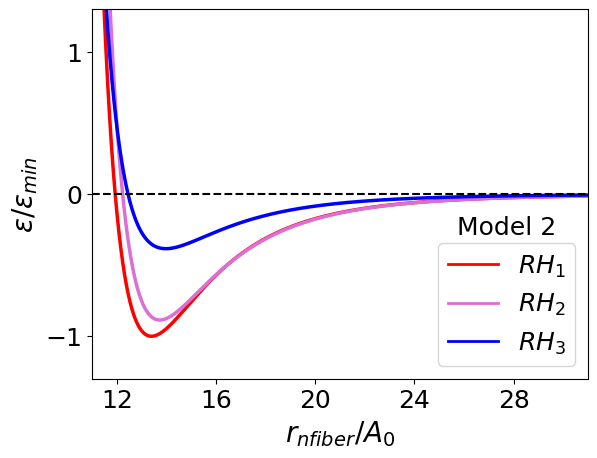

In [35]:
plt.figure(1)
parameters = {'legend.fontsize': 18}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
for i in range(len(v)):
    plt.plot((r*1e9*nc)/10, (v[i]*1e21)/(-np.min(v[0])*1e21),linewidth=2.5,color=colores[i])
plt.xlabel('$r_{nfiber}/A_0$', size=20)
plt.ylabel('$\\epsilon$/$\\epsilon_{min}$', size=20)
plt.xlim(11, 31)
plt.ylim(-1.3,1.3)
plt.locator_params(axis='y', nbins=5)
info_leyenda = [("r", "$RH_1$"),("orchid", "$RH_2$"),("b", "$RH_3$")]
plt.legend([Line2D([0], [0], color=clave[0], lw=2) for clave in info_leyenda],[clave[1] for clave in info_leyenda],
           loc="lower right")
plt.axhline(y=0, color='k', linestyle='--')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.text(0.85, 0.4, "Model 2", transform=plt.gcf().transFigure, fontsize=18,ha='right', va='bottom')


plt.savefig('Figures/potential_fit2.png', bbox_inches='tight',dpi=400)
plt.show()


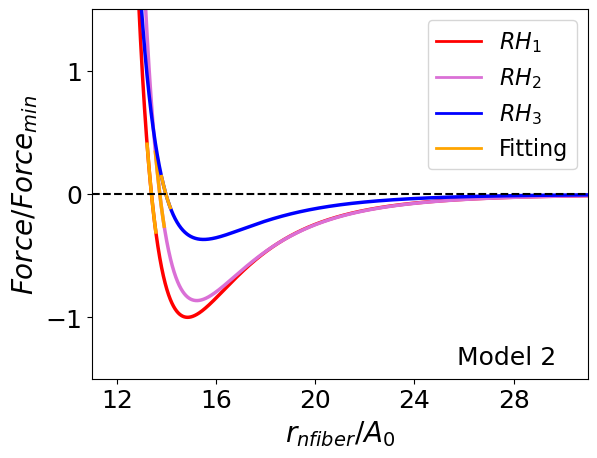

In [19]:
plt.figure()
parameters = {'legend.fontsize': 16}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
for i in range (len(sigma)):
  plt.plot((r*1e9*nc)/10, (F[i]*1e12/-np.min(F[0]*1e12)),linewidth=2.5,color=colores[i])
  plt.plot((rfitting[i]*1e9*nc)/10,(Ffitting[i]*1e12/-np.min(F[0]*1e12)),color='orange', label= 'Fitting',linestyle='-',linewidth=2.5)
plt.xlabel('$r_{nfiber}/A_0$', size=20)
plt.ylabel('$Force/Force_{min}$', size=20)
plt.xlim(11, 31)
plt.ylim(-1.5,1.5)
plt.locator_params(axis='y', nbins=5)
info_leyenda = [("r", "$RH_1$"),("orchid", "$RH_2$"),("b", "$RH_3$"),("orange","Fitting")]
plt.legend([Line2D([0], [0], color=clave[0], lw=2) for clave in info_leyenda],[clave[1] for clave in info_leyenda],loc='upper right')
plt.axhline(y=0, color='k', linestyle='--')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.text(0.85, 0.13, "Model 2", transform=plt.gcf().transFigure, fontsize=18,ha='right', va='bottom')


plt.savefig('Figures/fuerza_fit2.png', bbox_inches='tight',dpi=400)
plt.show()

In [20]:
# ============ PRINT R_SQUARED ===============
for i in range(len(sigma)):
  print('R_SQUARED "R^2" FOR RH',[i+1],'IS:',r_squared[i])
# ===========================================

R_SQUARED "R^2" FOR RH [1] IS: 0.9949369621765571
R_SQUARED "R^2" FOR RH [2] IS: 0.995179556998329
R_SQUARED "R^2" FOR RH [3] IS: 0.9953460031134275


In [21]:
# =========== PRINT SPRING CONSTANT ==========
for i in range(len(sigma)):
  print('SPRING CONSTANT "K" FOR RH',[i+1],'IS:',k[i])
# ============================================

SPRING CONSTANT "K" FOR RH [1] IS: [0.33238519]
SPRING CONSTANT "K" FOR RH [2] IS: [0.28011897]
SPRING CONSTANT "K" FOR RH [3] IS: [0.11715052]


In [22]:
# =========== PRINT YOUNG'S MODULE ==========
for i in range(len(sigma)):
  print("YOUNG'S MODULE FOR HR",[i+1],'IS:',E[i]*1e-6,'[MPa]')
# =========================================

YOUNG'S MODULE FOR HR [1] IS: 577.8660325257258 [MPa]
YOUNG'S MODULE FOR HR [2] IS: 475.08864557523515 [MPa]
YOUNG'S MODULE FOR HR [3] IS: 195.20326859714015 [MPa]


## EPSILON, SIGMA AND RH vs YOUNG'S MODULUS

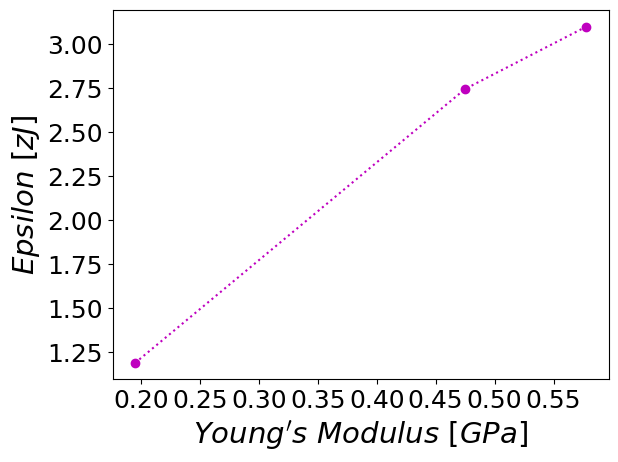

In [23]:
E1 = np.array(E)*1e-9
epsilon1 = epsilon*1e21
HRt2 = np.transpose(HR2)
plt.figure()
plt.plot(E1, epsilon1,':om')
plt.ylabel('$Epsilon\ [zJ]$', weight='bold', size=21)
plt.xlabel("$Young's\ Modulus\ [GPa]$", weight='bold', size=21)
parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
#plt.savefig('Figures/eps2.png', bbox_inches='tight',dpi=400)
plt.show()

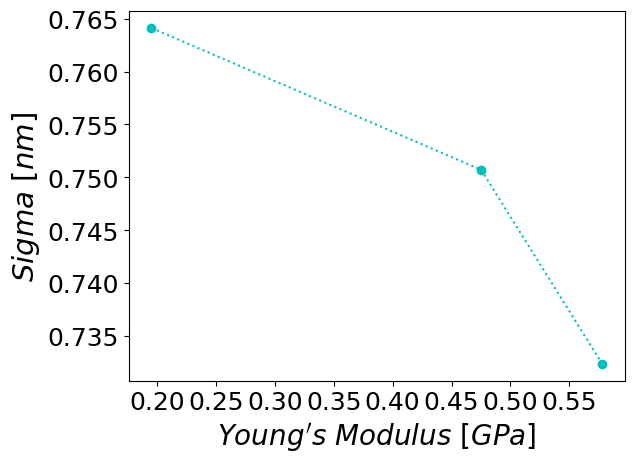

In [24]:
# sigma vs. young's module
plt.plot(E1, sigma*1e9,':oc')
plt.ylabel('$Sigma\ [nm]$', weight='bold', size=21)
plt.xlabel("$Young's\ Modulus\ [GPa]$", weight='bold', size=20)
parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
#plt.savefig('Figures/sigma2.png', bbox_inches='tight',dpi=400)
plt.show()

/tmp/ipykernel_19027/3907969273.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ob-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(E1,HRt2,'ob-',linestyle='--')


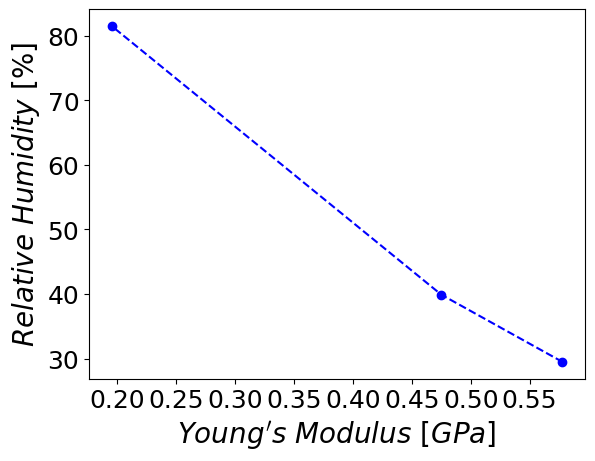

In [25]:
# RH vs. young's module
plt.plot(E1,HRt2,'ob-',linestyle='--')
plt.xlabel("$Young's\ Modulus\ [GPa]$", weight='bold', size=20)
plt.ylabel('$Relative\ Humidity\ [\%]$', weight='bold', size=20)
parameters = {'legend.fontsize': 14}
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update(parameters)
#plt.savefig('Figures/rhy2.png', bbox_inches='tight',dpi=400)
plt.show()